<h1 align='center'>HEART DISEASE PREDICTION ENSEMBLE METHODS</h1>

# Important Libraries

Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Numpy: https://numpy.org/devdocs/user/quickstart.html

sklearn: https://scikit-learn.org
        
Collections: https://www.guru99.com/python-counter-collections-example.html

Seaborn: https://seaborn.pydata.org/tutorial/introduction.html#:~:text=Seaborn%20is%20a%20library%20for,explore%20and%20understand%20your%20data.

In [1]:
import pandas as pd #data structures and functions
import numpy as np #support for arrays and mathematical functions

from sklearn.linear_model import LogisticRegression #model for binary classification and regression
from sklearn.tree import DecisionTreeClassifier #decision trees for classification
from sklearn.ensemble import AdaBoostClassifier #boosting model
from sklearn.metrics import confusion_matrix #function to compute a confusion matrix
from collections import Counter #class for counting

import matplotlib.pyplot as plt #plotting library for visualizations
import seaborn as sns #data visualization library based on Matplotlib

# Load and Understand the Data

Dataset: https://www.kaggle.com/datasets/zeeshanmulla/heart-disease-dataset

In [2]:
df = pd.read_csv("Heart_data.csv")

In [3]:
df = df.dropna()
len(df)

303

In [4]:
df = df.drop_duplicates()
len(df)

302

Display basic info about the dataset

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None


In [6]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [7]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


 classes are balanced or imbalanced

In [10]:
class_distribution = df['target'].value_counts()
print(class_distribution)

1    164
0    138
Name: target, dtype: int64


# Data Visualization

Histograms and Distributions: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

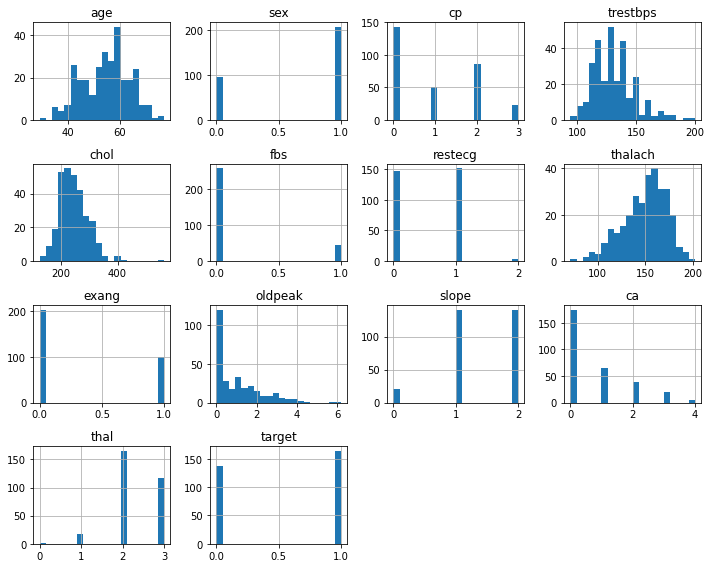

In [11]:
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

Correlation Matrix: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html 

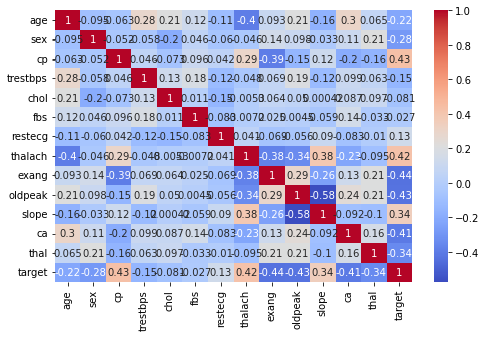

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

Box Plots: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

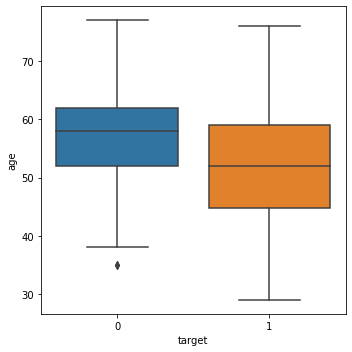

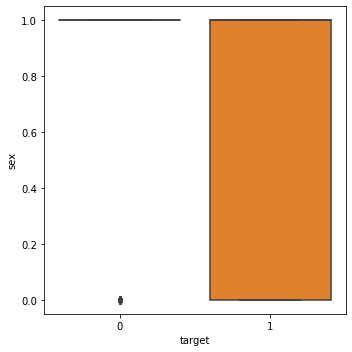

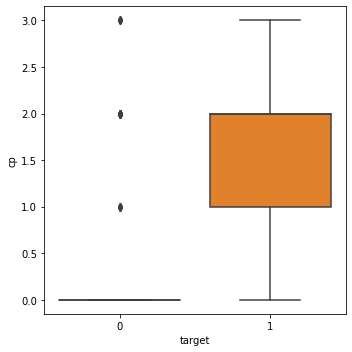

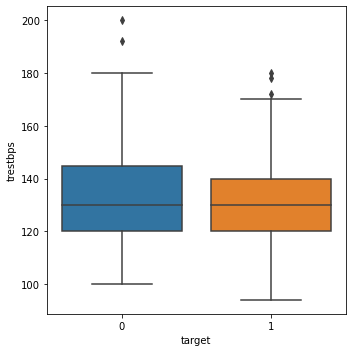

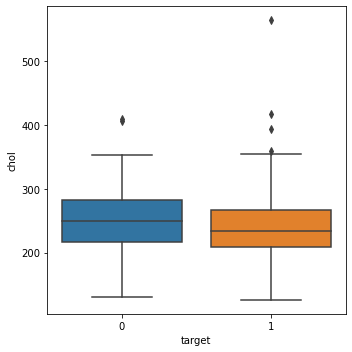

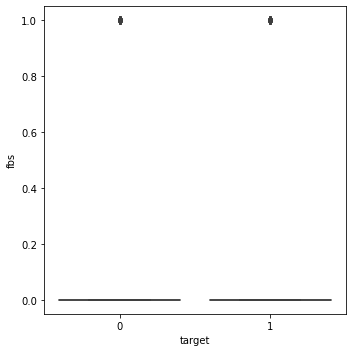

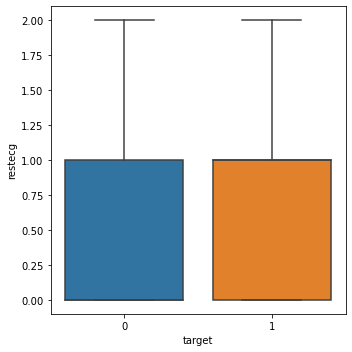

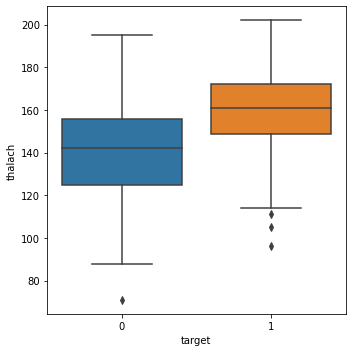

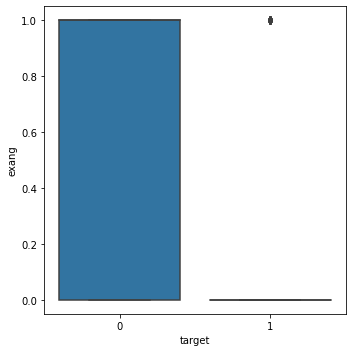

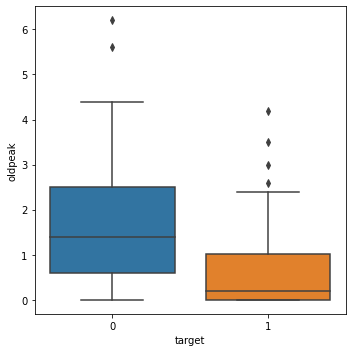

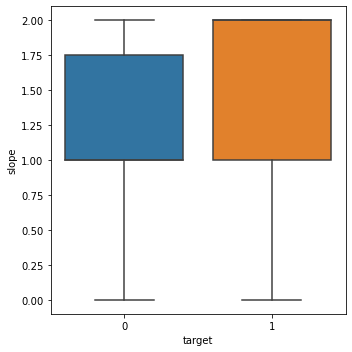

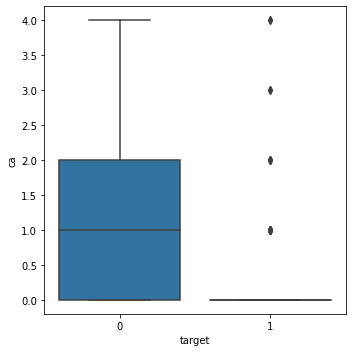

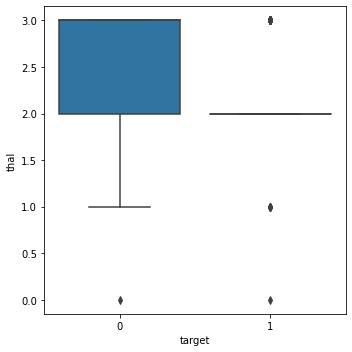

In [13]:
data1 = df.drop("target",axis="columns")
y1 = df.target
for i in data1.columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=y1, y=i, data=data1)
    plt.tight_layout()
    plt.show()

There is slight imbalance in our dataset but since it is not major we will not worry about it!

<h3>Train test split</h3>

In [14]:
X = df.drop("target",axis="columns")
y = df.target

Scaling data using standard scalar: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [15]:
from sklearn.preprocessing import StandardScaler #standerdization process

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.94979429,  0.68265615,  1.97647049,  0.76406571, -0.26128493,
         2.38979311, -1.0025412 ,  0.01882584, -0.69834428,  1.08402203,
        -2.27118179, -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , -0.09140084,  0.06774054,
        -0.41844626,  0.90165655,  1.63697881, -0.69834428,  2.11892611,
        -2.27118179, -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , -0.09140084, -0.82256367,
        -0.41844626, -1.0025412 ,  0.98097085, -0.69834428,  0.30784398,
         0.97951442, -0.71491124, -0.51399432]])

Splitting Data for training and testing: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [16]:
from sklearn.model_selection import train_test_split  #splitting dataset 
X_train1, X_test1, y_train, y_test = train_test_split(X_scaled, y, random_state=10)

Feature Selection: https://scikit-learn.org/stable/modules/feature_selection.html

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif #for selecting more important features
num_features_to_select = 5
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train = selector.fit_transform(X_train1, y_train)
X_test = selector.transform(X_test1)

# K-NN classifier function

In [18]:
def euclidean_distance(p1, p2):  #Euclidean Distance function
    return sum((a - b) ** 2 for a, b in zip(p1, p2)) ** 0.5 #square root of squared distance

def knn1(train_data, labels, test_data, k): #KNN predictor function
    distances = [(euclidean_distance(test_data, data_point), label) for data_point, label in zip(train_data, labels)] 
    sorted_distances = sorted(distances, key=lambda x: x[0]) #Sort the list of distances
    k_near_neighbors = sorted_distances[:k]  # K nearest points
    label_cnts = {} 
    label_cnts = Counter(k_near_neighbors)
    return label_cnts.most_common(1)[0][0]

# Bagging Function

In [19]:
def bagging_FUNC(X_train, X_test, y_train, estimater, n_bags):

    predictions = []
    for _ in range(n_bags):
        # Bootstrap sample of the training data
        index = np.random.choice(len(X_train), len(X_train), replace=True)
        X_train_btstr = X_train[index]
        y_train_btstr = y_train.iloc[index]

        # KNN classifier on the bootstrap sample
        if estimater>0:
            #predicted_labels = knnsrc(X_train_btstr, y_train_btstr, X_test, estimater) 
            predicted_labels = [knn1(X_train_btstr, y_train_btstr, X_t, estimater) for X_t in X_test]
        # LogisticRegression on the bootstrap sample
        if estimater==0:
            model = LogisticRegression(random_state=42)
            # Fit the model to the training data
            model.fit(X_train, y_train)
            # Make predictions on the test set
            predicted_labels = model.predict(X_test)
            
        predictions.append(predicted_labels) #collecting all predictions togather

    # Aggregating predictions using majority voting
    bagged_predictions = []
    for i in range(len(predictions[0])):
        labels = [predictions[j][i] for j in range(n_bags)]
        unique_labels, label_counts = np.unique(labels, return_counts=True)
        major_label = unique_labels[np.argmax(label_counts)]
        bagged_predictions.append(major_label)
    return bagged_predictions

# MAIN 

References:
confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Ensemble methods Bagging: https://scikit-learn.org/stable/modules/ensemble.html

AdaBoost: https://scikit-learn.org/stable/modules/ensemble.html#adaboost

In [25]:
while 1:
    print("\nMenu:")
    print("1. Bagging")
    print("2. Boosting")
    print("3. Traditional Algorithm")
    print("4. Comparision")
    print("5. Exit")
    choice = input("Enter your choice: ")
#--------------------------------------------------------------------------------------------------------------------
#For Bagging
    if choice == "1":   
        print("\nChoose base estimater")
        print("1. KNN")
        print("2. LOGESTIC")
        choice1 = input("Enter your choice: ")
        num_bags = int(input("Enter number of bags: "))
        if choice1 == "1":
            KN = int(input("Enter K: "))
            bagged_predictions = bagging_FUNC(X_train, X_test, y_train, KN, num_bags)
            bagged_predictions = np.array(bagged_predictions)
            bagged_predictions = bagged_predictions.astype(int)
            # Plot the confusion matrix as a heatmap
            cm = confusion_matrix(y_test, bagged_predictions)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                        xticklabels=["Predicted 0", "Predicted 1"],
                        yticklabels=["Actual 0", "Actual 1"])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix - Bagging with k-NN')
            plt.show()
            accuracy = format((np.mean(bagged_predictions == y_test)*100),".6f")
            print("\nBagging k-NN Accuracy:", accuracy, "%")
        elif choice1 == "2":
            bagged_predictions = bagging_FUNC(X_train, X_test, y_train, 0, num_bags)
            # Plot the confusion matrix as a heatmap
            cm = confusion_matrix(y_test, bagged_predictions)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                        xticklabels=["Predicted 0", "Predicted 1"],
                        yticklabels=["Actual 0", "Actual 1"])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix - Bagging with Logestic Regression')
            plt.show()
            accuracy = format((np.mean(bagged_predictions == y_test)*100),".6f")
            print("\nBagging Logestic Accuracy:", accuracy, "%")
        else:
            print("\nInvalid choice. Please try again.")

#--------------------------------------------------------------------------------------------------------------------
#For Boosting
    elif choice == "2":   
        print("\nChoose base estimater")
        print("1. Decision Tree")
        print("2. LOGESTIC")
        choice1 = input("Enter your choice: ")
        estimators_boost = int(input("Enter number of estimators: "))
        if choice1 == "1":
            KN = int(input("Enter Deapth: "))

            dt_classifier = DecisionTreeClassifier(max_depth=KN)

            adaboost_classifier = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=estimators_boost)
            
            # Train the AdaBoost classifier
            adaboost_classifier.fit(X_train, y_train)

            # Evaluate the classifier on the test data
            accuracy = format((adaboost_classifier.score(X_test, y_test)*100),".6f")

            print("\nBoosting with Decision Tree Classifier Accuracy:", accuracy, "%")
        elif choice1 == "2":
            # Create a base Logistic Regression
            LgRegression = LogisticRegression()

            # Create an AdaBoost classifier with KNN as base learner
            adaboost_classifier = AdaBoostClassifier(base_estimator=LgRegression, n_estimators=estimators_boost)

            # Train the AdaBoost classifier
            adaboost_classifier.fit(X_train, y_train)

            # Evaluate the classifier on the test data
            accuracy = format((adaboost_classifier.score(X_test, y_test)*100),".6f")
            print("\nBoosting with Logestic Regression Accuracy:", accuracy, "%")
        else:
            print("\nInvalid choice. Please try again.")

#--------------------------------------------------------------------------------------------------------------------
#Traditional Algorithms
    elif choice == "3":    
        print("\n Choose estimater")
        print("1. KNN")
        print("2. LOGESTIC")
        print("3. Decision Tree")
        choice2 = input("\n Enter your choice: ")
        if choice2 == "1":
            KKN = int(input("Enter K: "))
            predicted_labels = [knn1(X_train, y_train, d, KKN) for d in X_test]
            predicted_labels1 =  [predicted_labels[i][1] for i in range(len(predicted_labels))]
            # Plot the confusion matrix as a heatmap
            cm = confusion_matrix(y_test, predicted_labels1)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                        xticklabels=["Predicted 0", "Predicted 1"],
                        yticklabels=["Actual 0", "Actual 1"])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix - k-NN')
            plt.show()
                 
            accuracy = format((np.mean(predicted_labels1 == y_test)*100),".6f")
            print("\nTraditional k-NN Accuracy:", accuracy, "%")
        elif choice2 == "2":
            model = LogisticRegression(random_state=42)
            # Fit the model to the training data
            model.fit(X_train, y_train)
            # Make predictions on the test set
            predicted_labels = model.predict(X_test)
            cm = confusion_matrix(y_test, predicted_labels)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                        xticklabels=["Predicted 0", "Predicted 1"],
                        yticklabels=["Actual 0", "Actual 1"])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix - Logestic Rreegression')
            plt.show()
            accuracy = format((np.mean(predicted_labels == y_test)*100),".6f")
            print("\nTraditional Logestic Accuracy:", accuracy, "%")
        elif choice2 == "3":
            KN = int(input("Enter Deapth: "))

            dt_classifier = DecisionTreeClassifier(max_depth=KN)
            # Fit the model to the training data
            dt_classifier.fit(X_train, y_train)
            # Make predictions on the test set
            predicted_labels = dt_classifier.predict(X_test)
            cm = confusion_matrix(y_test, predicted_labels)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                        xticklabels=["Predicted 0", "Predicted 1"],
                        yticklabels=["Actual 0", "Actual 1"])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix - Decision Tree')
            plt.show()
            accuracy = format((np.mean(predicted_labels == y_test)*100),".6f")
            print("\nTraditional Decision Tree Classifier Accuracy:", accuracy, "%")
        else:
            print("\nInvalid choice. Please try again.")
#--------------------------------------------------------------------------------------------------------------------------------
#Comarision
    elif choice == "4":
        print("\n Choose compair")
        print("1. Bagging")
        print("2. Boosting")
        choice2 = input("\n Enter your choice: ")
        if choice2 == "1":
            baggingc=[]
            KKN = int(input("Enter K: "))
            nbag= int(input("Enter num of bags: "))
            predicted_labels = [knn1(X_train, y_train, d, KKN) for d in X_test]
            predicted_labels1 =  [predicted_labels[i][1] for i in range(len(predicted_labels))]
            baggingc.append((np.mean(predicted_labels1 == y_test)*100))
            
            bagged_predictions = bagging_FUNC(X_train, X_test, y_train, KKN, nbag)
            bagged_predictions = np.array(bagged_predictions)
            bagged_predictions = bagged_predictions.astype(int)
            baggingc.append(np.mean(bagged_predictions == y_test)*100)
            
            model = LogisticRegression(random_state=42)
            model.fit(X_train, y_train)
            predicted_labelsl = model.predict(X_test)
            baggingc.append(np.mean(predicted_labelsl == y_test)*100)
            
            bagged_predictionsl = bagging_FUNC(X_train, X_test, y_train, 0, nbag)
            baggingc.append(np.mean(bagged_predictionsl == y_test)*100)
            
            labels = ['KNN', 'Bagging KNN', 'Logistic Regression', 'Bagging Logistic Regression']
            colors = ['purple', 'purple', 'green', 'green']
            plt.figure(figsize=(10, 6))
            # Create an array of indices for the x-axis
            x = np.arange(len(labels))
            # Create the bar graph
            plt.bar(x, baggingc, width=0.4, align='center', tick_label=labels, color=colors)
            # Set the y-axis label
            plt.ylabel('Accuracy (%)')
            # Set a title for the graph
            plt.title('Comparison of Different Models with Bagging')
            # Show the graph
            plt.show()
            
        elif choice2 == "2":
            boostc=[]
            estimators_boost = int(input("Enter number of Estimators: "))
            KN = int(input("Enter Deapth for Decision Tree: "))
            dt_classifier = DecisionTreeClassifier(max_depth=KN)
            dt_classifier.fit(X_train, y_train)
            predicted_labels = dt_classifier.predict(X_test)
            boostc.append(np.mean(predicted_labels == y_test)*100)
            
            adaboost_classifier = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=estimators_boost)
            adaboost_classifier.fit(X_train, y_train)
            boostc.append(adaboost_classifier.score(X_test, y_test)*100)
            
            model = LogisticRegression(random_state=42)
            model.fit(X_train, y_train)
            predicted_labelsl = model.predict(X_test)
            boostc.append(np.mean(predicted_labelsl == y_test)*100)
            
            adaboost_classifierl = AdaBoostClassifier(base_estimator=model, n_estimators=estimators_boost)
            adaboost_classifierl.fit(X_train, y_train)
            boostc.append(adaboost_classifierl.score(X_test, y_test)*100)
            
            labels = ['Decision Tree', 'AdaBoost Decision Tree', 'Logistic Regression', 'AdaBoost Logistic Regression']
            colors = ['purple', 'purple', 'green', 'green']
            # Create an array of indices for the x-axis
            
            x = np.arange(len(labels))
            plt.figure(figsize=(10, 6))
            # Create the bar graph
            plt.bar(x, boostc, width=0.4, align='center', tick_label=labels, color=colors)
           
            # Set the y-axis label
            
            plt.ylabel('Accuracy (%)')
            # Set a title for the graph
            plt.title('Comparison of Different Models with AdaBoost')
            # Show the graph
            plt.show()
        else:
            print("\nInvalid choice. Please try again.")
#--------------------------------------------------------------------------------------------------------------------------------
#Exit
    elif choice == "5":
        print("\nThank You.")
        break
#---------------------------------------------------------------------------------------------------------------------------------
#Invalid choice
    else:
        print("\nInvalid choice. Please try again.")
        


Menu:
1. Bagging
2. Boosting
3. Traditional Algorithm
4. Comparision
5. Exit
Enter your choice: 2

Choose base estimater
1. Decision Tree
2. LOGESTIC
Enter your choice: 2
Enter number of estimators: 50

Boosting with Logestic Regression Accuracy: 75.000000 %

Menu:
1. Bagging
2. Boosting
3. Traditional Algorithm
4. Comparision
5. Exit
Enter your choice: 5

Thank You.
